In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv
import os

In [2]:
# Read the data
with open('/Users/owencrew/Downloads/prism_users.csv', 'r') as file:
    reader = csv.DictReader(file)
    df = list(reader)

In [3]:
# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(df)

In [4]:
rfm_scores = df[['Recency', 'Frequency', 'Monetary']]

In [5]:
# Check the data types of the columns in rfm_scores
print(rfm_scores.dtypes)

Recency      object
Frequency    object
Monetary     object
dtype: object


In [6]:
# Change to numeric data types
rfm_scores['Recency'] = pd.to_numeric(rfm_scores['Recency'])
rfm_scores['Frequency'] = pd.to_numeric(rfm_scores['Frequency'])
rfm_scores['Monetary'] = pd.to_numeric(rfm_scores['Monetary'])

/var/folders/kg/2xrn8kzj23540fd5f2xnnr4h0000gn/T/ipykernel_28927/243764793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_scores['Recency'] = pd.to_numeric(rfm_scores['Recency'])
/var/folders/kg/2xrn8kzj23540fd5f2xnnr4h0000gn/T/ipykernel_28927/243764793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_scores['Frequency'] = pd.to_numeric(rfm_scores['Frequency'])
/var/folders/kg/2xrn8kzj23540fd5f2xnnr4h0000gn/T/ipykernel_28927/243764793.py:4: SettingWithCopyWarning: 
A value is trying to be se

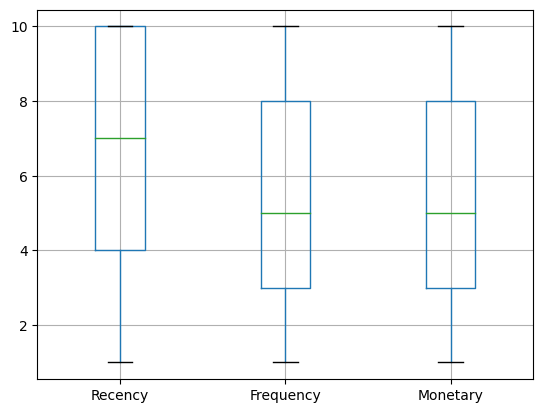

In [7]:
rfm_scores.boxplot()
plt.show()

In [8]:
# set the number of clusters to 3
kmeans = KMeans(n_clusters=3)

In [9]:
# Normalize the RFM scores
rfm_data_norm = (rfm_scores - rfm_scores.mean()) / rfm_scores.std()

In [10]:
# fit the k-means model to the RFM scores
kmeans.fit(rfm_data_norm)

/Users/owencrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [11]:
# add the cluster labels to the original dataframe
df['cluster'] = kmeans.labels_
df['Recency'] = df['Recency'].astype(float)
df['Frequency'] = df['Frequency'].astype(float)
df['Monetary'] = df['Monetary'].astype(float)
df['cluster'] = df['cluster'].astype(int)

In [12]:
# print the number of customers in each cluster
print(df['cluster'].value_counts())

0    41233
2    40466
1    37070
Name: cluster, dtype: int64


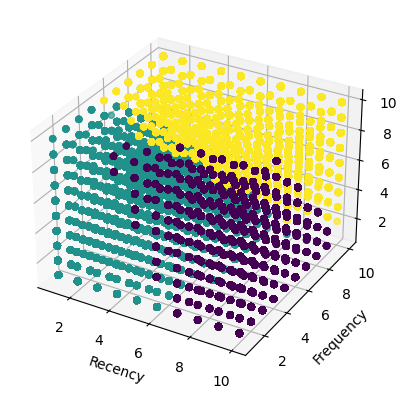

In [13]:
# create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Recency'], df['Frequency'], df['Monetary'], c=df['cluster'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

In [14]:
# Write the updated data to a new CSV file
with open('users_rfm_cluster_data.csv', 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=df.columns)
    writer.writeheader()
    writer.writerows(df.to_dict('records'))